In [11]:
cd c:\Users\seand\OneDrive\Dokumente\Masterthesis\CL_PDE_Solv

c:\Users\seand\OneDrive\Dokumente\Masterthesis\CL_PDE_Solv


In [12]:
from Problems.oneDim_Problems.sintsin2tproblem import clustering, f, exact_sol, clustering_grid
from models_code.SubproblemNetworks.LocalDeepONet_oneDim import LocalDeepONet_oneDim
from models_code.lossfunc import *
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path

from src.config import *

# Plots of Problem defining functions

<function matplotlib.pyplot.show(close=None, block=None)>

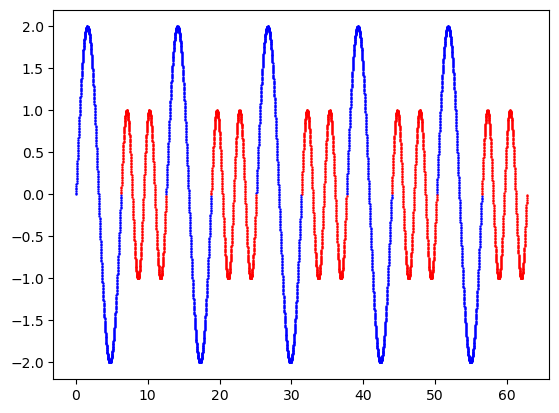

In [3]:
#plot f in [0,20 pi]
grid_x = torch.arange(0,20* np.pi,0.01)
out_f = np.array([f(t).numpy() for t in grid_x])
clusterlabel = clustering_grid(grid_x)[:,0]
plt.scatter(grid_x.numpy()[clusterlabel == 0] , out_f[clusterlabel == 0], color = 'blue', s = 0.5)
plt.scatter(grid_x.numpy()[clusterlabel == 1] , out_f[clusterlabel == 1], color = 'red', s = 0.5)
#plt.plot(grid_x.numpy() , out_f)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

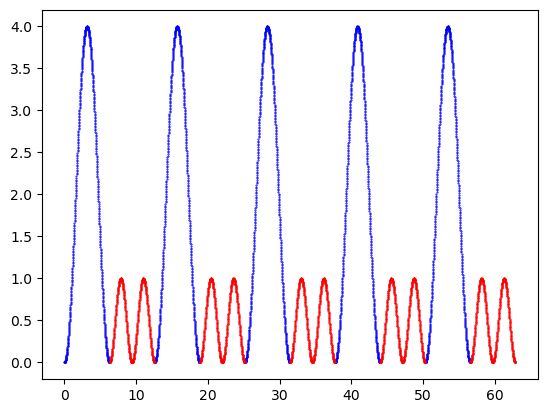

In [4]:
#plot exact solution in [0,20 pi]
grid_x = torch.arange(0,20* np.pi,0.01)
out_exact_sol = np.array([exact_sol(t).numpy() for t in grid_x])
clusterlabel = clustering_grid(grid_x)[:,0]
plt.scatter(grid_x.numpy()[clusterlabel == 0] , out_exact_sol[clusterlabel == 0], color = 'blue', s = 0.2)
plt.scatter(grid_x.numpy()[clusterlabel == 1] , out_exact_sol[clusterlabel == 1], color = 'red', s = 0.2)
plt.show

# Training Loops Local Solutions

### Domain A

In [ ]:
#load local model A
sol_cluster_A = torch.load(Path(trained_models_address , 'local_A0.pt'))
sol_cluster_A.eval()

In [ ]:
#define Trainingset on A:
num_train_boundary = 15
t_grid = torch.linspace(0.,2*torch.pi,4000,requires_grad = True).view(-1,1).to('cuda')
boundary_t = torch.tensor(0., requires_grad = True).view(-1,1).to('cuda')
boundary_values = torch.linspace(-1.5,1.5,num_train_boundary, requires_grad = True).to('cuda')
#output on grid:
f_out = torch.zeros(t_grid.shape[0]).to('cuda')
for i in range(t_grid.shape[0]):
  f_out[i] = f(t_grid[i])

#model:
#






sol_cluster_A = LocalDeepONet_oneDim(1, 20, 10)
sol_cluster_A = sol_cluster_A.to('cuda')
alpha = 1e-3
beta = 0#1e-2
optimizer = torch.optim.Adam(sol_cluster_A.parameters(), lr = 1e-3)


for i in range(2000):
  optimizer.zero_grad()
  boundary_value_epoch = torch.full( t_grid.shape , boundary_values[i%num_train_boundary].item() , requires_grad = True).to('cuda')

  loss = D_loc(sol_cluster_A , boundary_t, boundary_value_epoch  , t_grid, f_out , alpha, beta )

  print(loss.item())
  loss.backward(retain_graph=True)
  optimizer.step()



<function matplotlib.pyplot.show(close=None, block=None)>

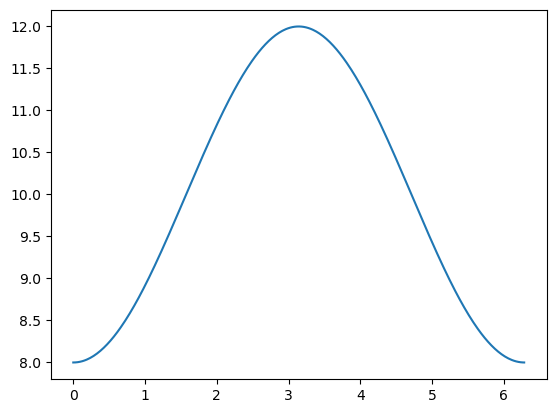

In [17]:
t_grid_A_test = torch.linspace(0.,2*torch.pi,400).view(-1,1)
sol_cluster_A.to('cpu')
sol = sol_cluster_A(t_grid_A_test,torch.full( t_grid_A_test.shape , 8.) )
plt.plot(t_grid_A_test.detach().numpy() , sol.detach().numpy())
plt.show

In [10]:
#save local model A
torch.save(sol_cluster_A, Path(trained_models_address , 'local_A0.pt'))

### Domain B

In [ ]:
#load local model B
sol_cluster_B = torch.load(Path(trained_models_address , 'local_B0.pt'))
sol_cluster_B.eval()

In [18]:
#define Trainingset on B:
t_grid = torch.linspace(2*torch.pi-0.1 ,4*torch.pi +0.1,2000,requires_grad = True).view(-1,1).to('cuda')
boundary_t = torch.tensor(2*torch.pi, requires_grad = True).view(-1,1).to('cuda')
boundary_values = torch.linspace(-1,1,10, requires_grad = True).to('cuda')
#output on grid:
f_out = torch.zeros(t_grid.shape[0]).to('cuda')
for i in range(t_grid.shape[0]):
  f_out[i] = f(t_grid[i])

#model:
sol_cluster_B = LocalDeepONet_oneDim(1, 20, 10)
sol_cluster_B.to('cuda')
alpha = 1e-3
beta = 0
optimizer = torch.optim.Adam(sol_cluster_B.parameters(), lr = 1e-3)
for i in range(2000):
  boundary_value_epoch = torch.full( t_grid.shape , boundary_values[i%10].item(), requires_grad = True).to('cuda')
  optimizer.zero_grad()
  loss = D_loc(sol_cluster_B , boundary_t, boundary_value_epoch  , t_grid, f_out , alpha, beta )
  print(f'loss: {loss.item()}')
  loss.backward(retain_graph=True)
  optimizer.step()

loss: 0.0007252325303852558
loss: 0.0010703288717195392
loss: 0.0006915898411534727
loss: 0.00042886947630904615
loss: 0.0006647263071499765
loss: 0.0007007014937698841
loss: 0.0005067080492153764
loss: 0.0004269613418728113
loss: 0.0005195275298319757
loss: 0.0005899135721847415
loss: 0.0005376272602006793
loss: 0.0004479539638850838
loss: 0.00042951476643793285
loss: 0.000482224568258971
loss: 0.000517846317961812
loss: 0.0004893651930615306
loss: 0.0004394214483909309
loss: 0.0004265344759915024
loss: 0.00045375467743724585
loss: 0.00047731236554682255
loss: 0.0004672310606110841
loss: 0.00043850429938174784
loss: 0.000424933445174247
loss: 0.00043726732837967575
loss: 0.00045404324191622436
loss: 0.0004522624658420682
loss: 0.00043559345067478716
loss: 0.00042504287557676435
loss: 0.0004305820039007813
loss: 0.0004412387206684798
loss: 0.00044200767297297716
loss: 0.00043258522055111825
loss: 0.00042519846465438604
loss: 0.00042768119601532817
loss: 0.000434394198236987
loss: 0.000

<function matplotlib.pyplot.show(close=None, block=None)>

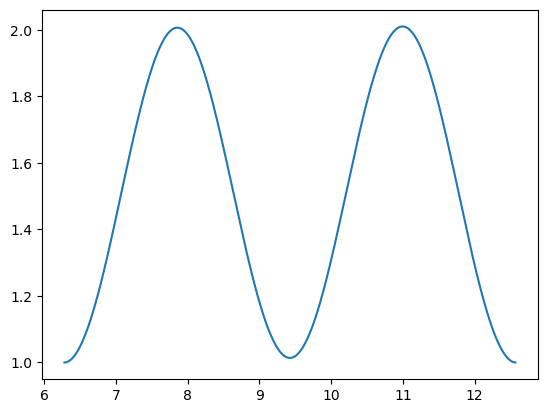

In [22]:
t_grid_B_test = torch.linspace(0.+2*torch.pi ,4*torch.pi,400).view(-1,1)
sol_cluster_B.to('cpu')
sol = sol_cluster_B(t_grid_B_test,torch.full( t_grid_B_test.shape , 1.) )
plt.plot(t_grid_B_test.detach().numpy() , sol.detach().numpy())
plt.show

In [21]:
#save local model B
torch.save(sol_cluster_B, Path(trained_models_address , 'local_B0.pt'))